In [1]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
train = pd.read_csv("../../Data/Price prediction/train.csv")
test = pd.read_csv("../../Data/Price prediction/test.csv")

In [3]:
print("shape of the train:", train.shape)
print("shape of the test:", test.shape)
# 8개의 feature

shape of the train: (3362796, 8)
shape of the test: (473392, 8)


In [4]:
# datetime 타입으로 변경
# is_calceled feature 추가

combine = [train, test]

for data in combine:
    data['is_canceled'] = data['amount'].map(lambda x: 1 if x < 0 else 0)

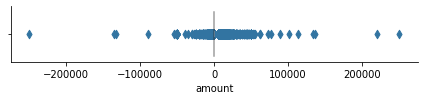

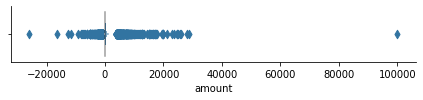

In [5]:
sns.catplot('amount', data=train, kind='boxen',
            height=1.5, aspect=4)
sns.catplot('amount', data=test, kind='boxen',
            height=1.5, aspect=4)

# train, test have negative 'amount' data.
# only a few of trades over 100000

In [6]:
# 거래 횟수 top 3

data = pd.concat([train, test])
temp = data.groupby('store_id').size() - data.groupby('store_id').is_canceled.sum()
temp.sort_values(ascending=False).head(3)

# store_id: 0, 753, 105

store_id
0      72361
753    39207
105    38781
dtype: int64

### Store_id: 0

In [50]:
store_0 = data[data['store_id']==0].sort_values('date').reset_index(drop=True)
store_0.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,is_canceled
0,0,2016-08-01,00:28:15,bf33518373,125,NaN,0,0,0
1,0,2016-08-01,22:45:24,2e1bd513df,650,NaN,0,0,0
2,0,2016-08-01,22:40:46,f00947507d,147,NaN,0,0,0
3,0,2016-08-01,22:33:31,5d6ee5ae51,75,NaN,0,0,0
4,0,2016-08-01,21:42:14,73dc9343d3,140,NaN,0,0,0


In [51]:
store_0['datetime'] = store_0['date'].astype(str) + ' ' + store_0['time'].astype(str)
store_0.drop(['date', 'time'], axis=1, inplace=True)

In [52]:
store_0['datetime'] = pd.to_datetime(store_0['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [53]:
store_0 = store_0.sort_values('datetime').reset_index(drop=True)

In [54]:
# 년 분기 월 시간

store_0['year'] = store_0['datetime'].dt.year
store_0['quarter'] = store_0['datetime'].dt.quarter
store_0['month'] = store_0['datetime'].dt.month
store_0['hour'] = store_0['datetime'].dt.hour

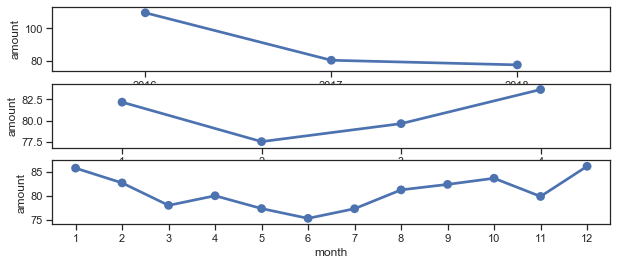

In [55]:
# 년도별 매출 추이

fig, ax = plt.subplots(3,1,figsize=(10,4))

sns.pointplot(y='amount', x='year', data=store_0, ax=ax[0], ci=None)
sns.pointplot(y='amount', x='quarter', data=store_0, ax=ax[1], ci=None)
sns.pointplot(y='amount', x='month', data=store_0, ax=ax[2], ci=None)

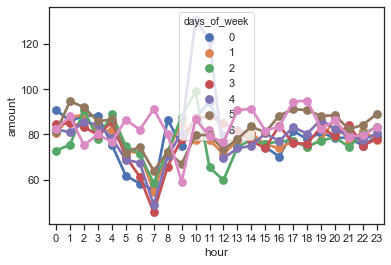

In [27]:
sns.pointplot(x='hour',y='amount', hue='days_of_week', data=store_0, ci=None)

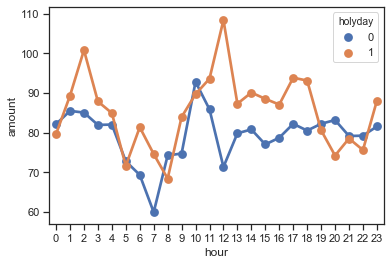

In [28]:
sns.pointplot(x='hour',y='amount', hue='holyday', data=store_0, ci=None)

C:\Users\lonj7\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


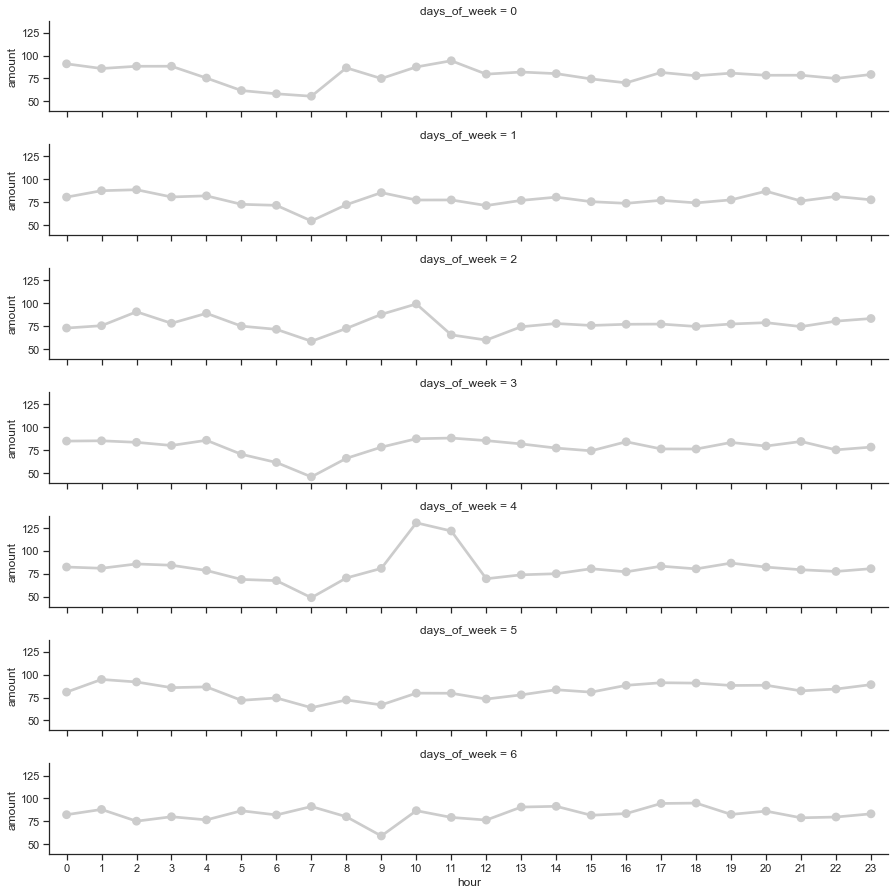

In [29]:
# 시간별 매출액 차이

g = sns.FacetGrid(store_0, row='days_of_week', height=1.8, aspect=7)
sns.set(style='ticks')
g.map(sns.pointplot,'hour','amount', ci=None, color="0.8")

In [34]:
store_0.head()

,store_id,card_id,amount,installments,days_of_week,holyday,is_canceled,datetime,year,quarter,month,hour,Sales for 7 days,Sales for 30 days,Sales for 100 days
datetime,,,,,,,,,,,,,,,
2016-08-01 00:28:15,0,bf33518373,125,NaN,0,0,0,2016-08-01 00:28:15,2016,3,8,0,NaN,NaN,NaN
2016-08-01 01:09:58,0,7a19a3a92f,90,NaN,0,0,0,2016-08-01 01:09:58,2016,3,8,1,NaN,NaN,NaN
2016-08-01 01:47:24,0,6f9fd7e241,150,NaN,0,0,0,2016-08-01 01:47:24,2016,3,8,1,NaN,NaN,NaN
2016-08-01 17:54:43,0,8bcf1d61b2,362,NaN,0,0,0,2016-08-01 17:54:43,2016,3,8,17,NaN,NaN,NaN
2016-08-01 18:48:53,0,6a722ce674,125,NaN,0,0,0,2016-08-01 18:48:53,2016,3,8,18,NaN,NaN,NaN


In [61]:
store_0['100_Days'] = store_0['amount'].rolling('100D').mean()
store_0['30_Days'] = store_0['amount'].rolling('30D').mean()

In [62]:
store_0.index = store_0.datetime

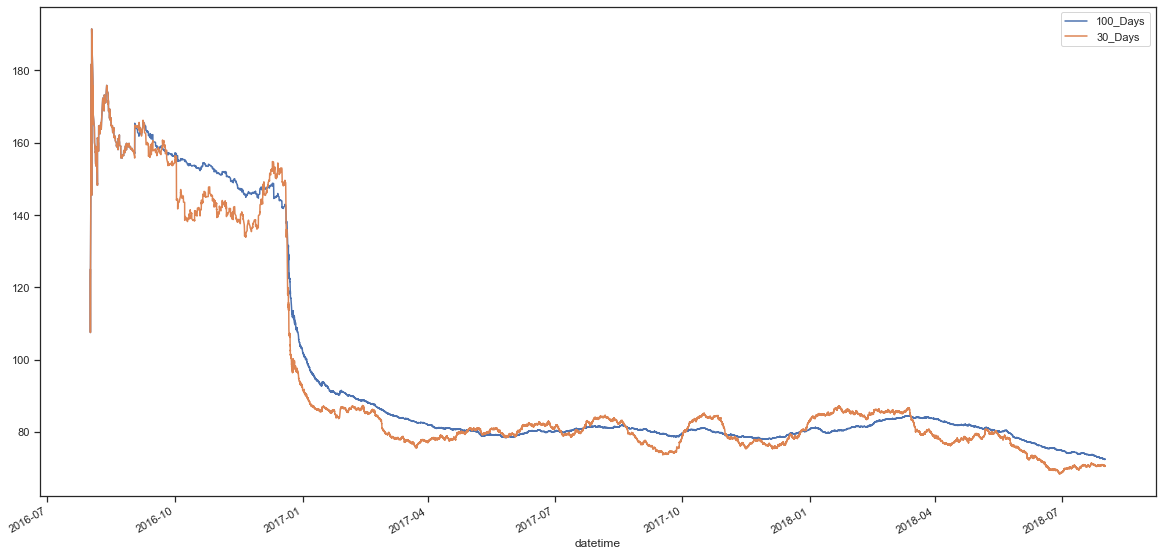

In [109]:
store_0['100_Days'].plot(subplots=False,figsize=(20,10))
store_0['30_Days'].plot(subplots=False,figsize=(20,10))
plt.legend()

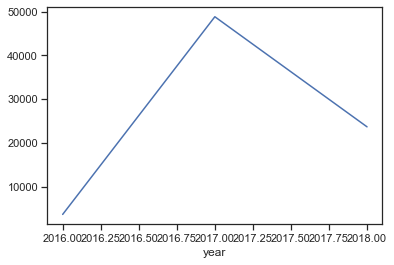

In [95]:
# 총 반품 금액 차이:
temp = store_0.loc[store_0['amount'] < 0]
temp.groupby('year').sum().amount.abs().plot()

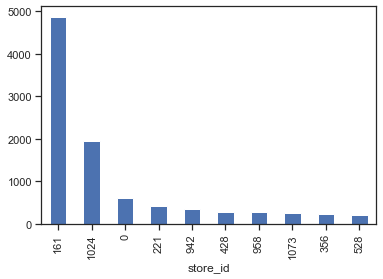

In [65]:
# 거래 취소 횟수 top 10

train.groupby('store_id').is_canceled.sum().sort_values(ascending=False).head(10).plot(kind='bar')
# store_id: 161과 1024의 거래 취소 횟수가 비교도 안 될 만큼 많다.

### store_id: 161

In [66]:
store_161 = data[data['store_id']==161].sort_values('date').reset_index(drop=True)
store_161.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,is_canceled
0,161,2017-09-19,21:54:49,4f0b979deb,192,NaN,1,0,0
1,161,2017-09-19,18:20:47,da968f092a,190,NaN,1,0,0
2,161,2017-09-20,21:46:57,af1f35999a,127,NaN,2,0,0
3,161,2017-09-20,21:30:35,84de153dbc,192,NaN,2,0,0
4,161,2017-09-20,20:32:47,f5ad3c84da,337,NaN,2,0,0


In [67]:
store_161['datetime'] = store_161['date'].astype(str) + ' ' + store_161['time'].astype(str)
store_161.drop(['date', 'time'], axis=1, inplace=True)

In [68]:
store_161['datetime'] = pd.to_datetime(store_161['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [69]:
store_161 = store_161.sort_values('datetime').reset_index(drop=True)

In [70]:
# 년 분기 월 시간

store_161['year'] = store_161['datetime'].dt.year
store_161['quarter'] = store_161['datetime'].dt.quarter
store_161['month'] = store_161['datetime'].dt.month
store_161['hour'] = store_161['datetime'].dt.hour

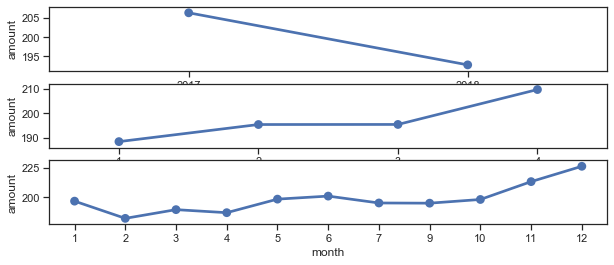

In [71]:
# 년도별 매출 추이

fig, ax = plt.subplots(3,1,figsize=(10,4))

sns.pointplot(y='amount', x='year', data=store_161, ax=ax[0], ci=None)
sns.pointplot(y='amount', x='quarter', data=store_161, ax=ax[1], ci=None)
sns.pointplot(y='amount', x='month', data=store_161, ax=ax[2], ci=None)

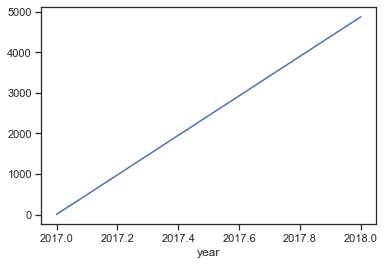

In [77]:
# 반품 수 차이
store_161.groupby("year").sum().is_canceled.plot()

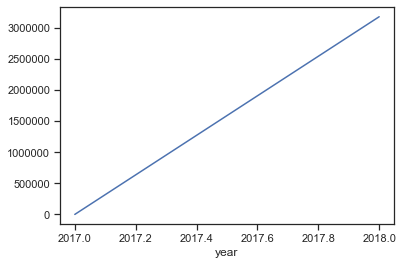

In [91]:
# 총 반품 금액 차이:
temp = store_161.loc[store_161['amount'] < 0]
temp.groupby('year').sum().amount.abs().plot()

In [104]:
store_161.index = store_161.datetime

In [105]:
store_161['100_Days'] = store_161['amount'].rolling('100D').mean()
store_161['30_Days'] = store_161['amount'].rolling('30D').mean()

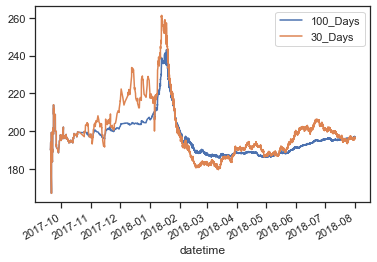

In [108]:
store_161['100_Days'].plot()
store_161['30_Days'].plot()
plt.legend()

In [241]:
# 매출이 꾸준히 증가하는 가게들
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
temp = pd.DataFrame(data.groupby(['store_id','year'])['amount'].sum())

In [242]:
temp

amount
store_id year         
0        2016   292754
         2017  3621290
         2018  1958824
1        2016   116045
         2017   341691
...                ...
1798     2016    29538
         2017    59751
         2018    20722
1799     2017   139631
         2018    53320

[4128 rows x 1 columns]

In [233]:
# 대충 꾸준히 증가하는 가게 목록

names = []
for i in temp.index.get_level_values('store_id').unique():
    length = len(temp.xs(i))
    if temp.xs(i).values[0] < temp.xs(i).values[length-1]:
        if temp.xs(i).values[length-2] < temp.xs(i).values[length-1]:
            names.append(i)

In [289]:
len(data.store_id.unique())

1778

In [290]:
len(names)/ len(data.store_id.unique())

0.21428571428571427

In [ ]:
store_161 = data[data['store_id']==161].sort_values('date').reset_index(drop=True)
store_161.head()

In [281]:
store_9 = data[data['store_id']==9].sort_values('date').reset_index(drop=True)
store_9.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,is_canceled,year
0,9,2017-08-04,11:29:56,e68e4f1f48,1460,3.0,4,0,0,2017
1,9,2017-09-07,13:31:36,e68e4f1f48,2000,3.0,3,0,0,2017
2,9,2017-09-22,21:10:13,02a43edfc9,75,NaN,4,0,0,2017
3,9,2017-10-23,22:48:36,ca38fb07c8,272,NaN,0,0,0,2017
4,9,2017-10-23,22:48:05,ca38fb07c8,1175,NaN,0,0,0,2017


In [282]:
store_9['datetime'] = store_9['date'].astype(str) + ' ' + store_9['time'].astype(str)
store_9.drop(['date', 'time'], axis=1, inplace=True)

In [283]:
store_9['datetime'] = pd.to_datetime(store_9['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [284]:
store_9 = store_9.sort_values('datetime').reset_index(drop=True)

In [285]:
# 년 분기 월 시간

store_9['year'] = store_9['datetime'].dt.year
store_9['quarter'] = store_9['datetime'].dt.quarter
store_9['month'] = store_9['datetime'].dt.month
store_9['hour'] = store_9['datetime'].dt.hour

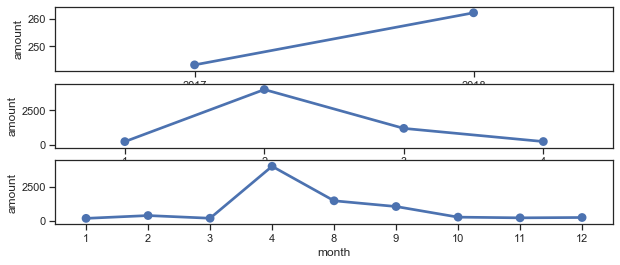

In [286]:
# 년도별 매출 추이

fig, ax = plt.subplots(3,1,figsize=(10,4))

sns.pointplot(y='amount', x='year', data=store_9, ax=ax[0], ci=None)
sns.pointplot(y='amount', x='quarter', data=store_9, ax=ax[1], ci=None)
sns.pointplot(y='amount', x='month', data=store_9, ax=ax[2], ci=None)

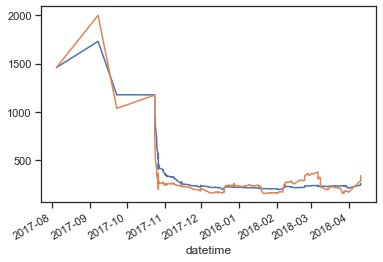

In [299]:
store_9.index = store_9.datetime

store_9['100_Days'] = store_9['amount'].rolling('100D').mean()
store_9['30_Days'] = store_9['amount'].rolling('30D').mean()

store_9['100_Days'].plot()
store_9['30_Days'].plot()

In [307]:
# 대충 꾸준히 증가하는 가게 목록

temp = pd.DataFrame(data.groupby(['store_id','year'])['amount'].sum())
names = []
names_more_than_3 = []
for i in temp.index.get_level_values('store_id').unique():
    length = len(temp.xs(i))
    if length >= 3:
        names_more_than_3.append(i)
        if temp.xs(i).values[0] < temp.xs(i).values[length-1]:
            if temp.xs(i).values[length-2] < temp.xs(i).values[length-1]:
                names.append(i)

In [311]:
print(len(names), len(names_more_than_3))

74 909


In [308]:
len(names) / len(names_more_than_3)

0.0814081408140814

In [312]:
names

[19,
 27,
 32,
 35,
 63,
 66,
 75,
 88,
 116,
 120,
 132,
 134,
 167,
 172,
 197,
 233,
 257,
 280,
 315,
 417,
 433,
 443,
 458,
 491,
 526,
 534,
 571,
 582,
 620,
 631,
 650,
 673,
 716,
 728,
 743,
 745,
 756,
 812,
 891,
 933,
 939,
 974,
 990,
 1003,
 1121,
 1135,
 1136,
 1142,
 1172,
 1180,
 1242,
 1248,
 1257,
 1264,
 1266,
 1281,
 1355,
 1365,
 1377,
 1394,
 1419,
 1451,
 1483,
 1508,
 1518,
 1547,
 1563,
 1607,
 1643,
 1657,
 1688,
 1734,
 1750,
 1785]

In [313]:
store_315 = data[data['store_id']==315].sort_values('date').reset_index(drop=True)
store_315.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,is_canceled,year
0,315,2016-08-01,16:14:13,2d2e5928df,517,NaN,0,0,0,2016
1,315,2016-08-08,15:01:13,70dd414a9a,520,NaN,0,0,0,2016
2,315,2016-08-16,19:10:38,65033ba3ec,500,NaN,1,0,0,2016
3,315,2016-08-17,17:10:52,617fb3fc90,617,NaN,2,0,0,2016
4,315,2016-08-19,14:50:42,a22034d88f,450,NaN,4,0,0,2016


In [314]:
store_315['datetime'] = store_315['date'].astype(str) + ' ' + store_315['time'].astype(str)
store_315.drop(['date', 'time'], axis=1, inplace=True)

In [315]:
store_315['datetime'] = pd.to_datetime(store_315['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [316]:
store_315 = store_315.sort_values('datetime').reset_index(drop=True)

In [317]:
# 년 분기 월 시간

store_315['year'] = store_315['datetime'].dt.year
store_315['quarter'] = store_315['datetime'].dt.quarter
store_315['month'] = store_315['datetime'].dt.month
store_315['hour'] = store_315['datetime'].dt.hour

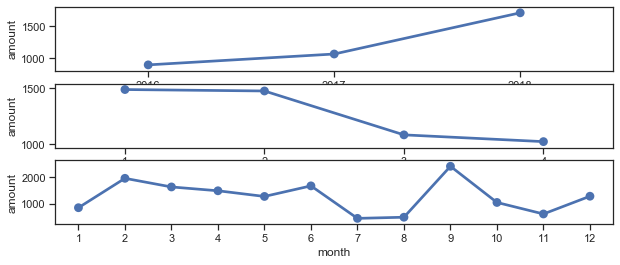

In [318]:
# 년도별 매출 추이

fig, ax = plt.subplots(3,1,figsize=(10,4))

sns.pointplot(y='amount', x='year', data=store_315, ax=ax[0], ci=None)
sns.pointplot(y='amount', x='quarter', data=store_315, ax=ax[1], ci=None)
sns.pointplot(y='amount', x='month', data=store_315, ax=ax[2], ci=None)

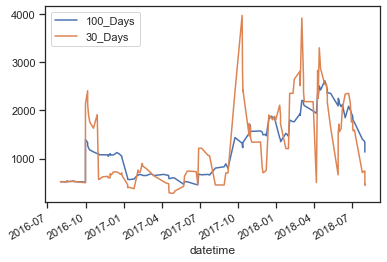

In [321]:
store_315.index = store_315.datetime

store_315['100_Days'] = store_315['amount'].rolling('100D').mean()
store_315['30_Days'] = store_315['amount'].rolling('30D').mean()

store_315['100_Days'].plot()
store_315['30_Days'].plot()
plt.legend()

- 교훈: 자영업을 하지말자 ㅋㅋ


1. 3년 이상 된 가게들이 얼마 없음
2. 3년 이상 된 가게들 중 꾸준히 매출이 증가하는 가게들이 얼마 없음
3. 꾸준히 증가하는 가게들 중에서도 매출이 떨어지고 있는 가게가 있음